# Guide: Exploratory Data Analysis using the Titanic Dataset

This notebook follows the guide for conducting exploratory data analysis on the Titanic dataset. We'll go through each step systematically to uncover insights about passenger survival rates and other patterns in the data.

## Step 1: Loading the Dataset and Required Libraries

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# Load the dataset
df = pd.read_csv('/content/titanic.csv')

# Display the first few rows
print("Preview of the dataset:")
df.head()

Preview of the dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 2: Running Descriptive Statistics

Let's examine the basic statistics of our dataset to understand the distribution of our numerical variables.

In [4]:
print('\nSummary statistics of the dataset:')
df.describe()



Summary statistics of the dataset:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Additional information about the dataset
print('\nDataset Information:')
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Step 3: Data Cleaning

Let's check for missing values and clean our dataset accordingly.

In [6]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())


Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:

# Clean the dataset
# 1. Remove the deck column as it has too many missing values
df = df.drop('Cabin', axis=1)


In [8]:

# 2. Fill missing age values with median
df['Age'] = df['Age'].fillna(df['Age'].median())


In [9]:

# 3. Drop rows with missing embarked values
df = df.dropna(subset=['Embarked'])


In [10]:

print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [11]:
# delete the 'PassengerId' column, 'Name', and the 'Ticket' column
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [12]:
# Display the first 10 rows of the cleaned dataset
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,28.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


## Step 4: Data Visualizations

### a. Age Distribution Analysis

Text(0, 0.5, 'Count')

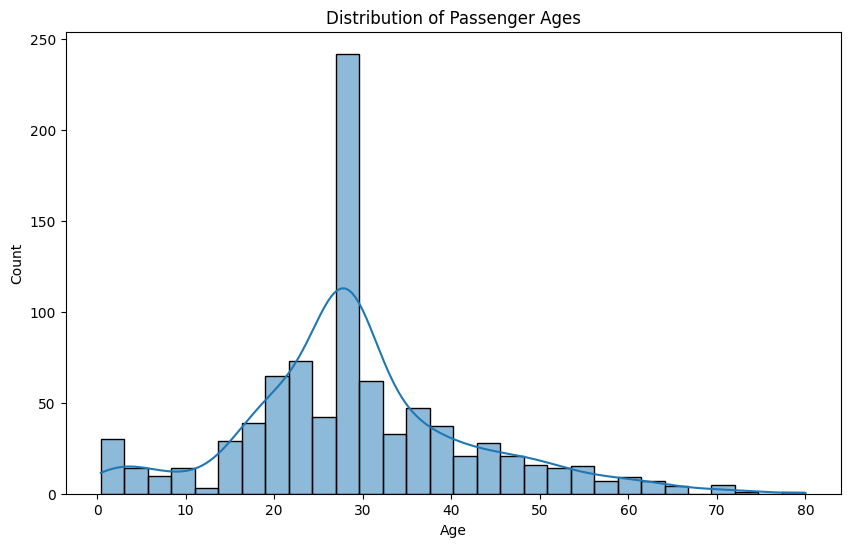

In [13]:
# Plot age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Count')


In [14]:

# Calculate skewness
skewness = df['Age'].skew()
print(f"\nSkewness of age distribution: {skewness:.2f}")
print("\nInterpretation:")
if skewness > 0:
    print("The age distribution is positively skewed (skewed right), indicating more younger passengers with a tail extending towards older ages.")
elif skewness < 0:
    print("The age distribution is negatively skewed (skewed left), indicating more older passengers with a tail extending towards younger ages.")
else:
    print("The age distribution is approximately symmetric.")

plt.show()


Skewness of age distribution: 0.51

Interpretation:
The age distribution is positively skewed (skewed right), indicating more younger passengers with a tail extending towards older ages.


### b. Survival Analysis by Different Features

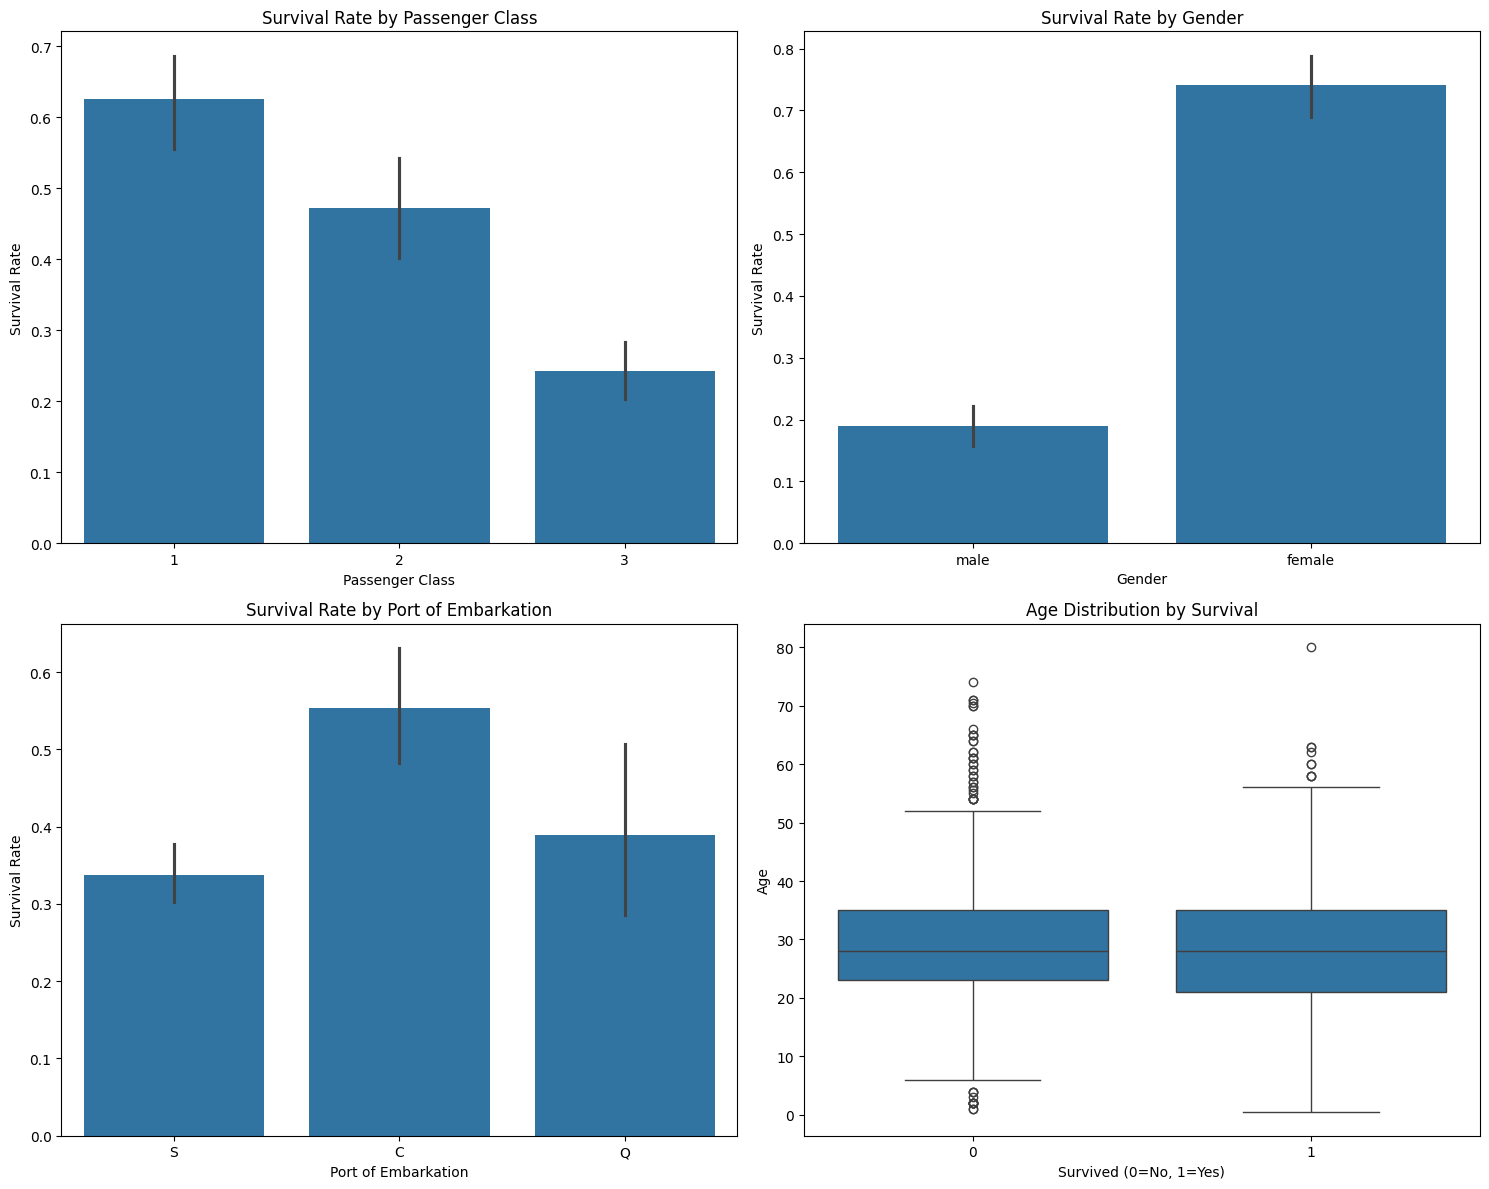

In [15]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Survival by Class
sns.barplot(data=df, x='Pclass', y='Survived', ax=axes[0,0])
axes[0,0].set_title('Survival Rate by Passenger Class')
axes[0,0].set_xlabel('Passenger Class')
axes[0,0].set_ylabel('Survival Rate')

# 2. Survival by Sex
sns.barplot(data=df, x='Sex', y='Survived', ax=axes[0,1])
axes[0,1].set_title('Survival Rate by Gender')
axes[0,1].set_xlabel('Gender')
axes[0,1].set_ylabel('Survival Rate')

# 3. Survival by Embarked
sns.barplot(data=df, x='Embarked', y='Survived', ax=axes[1,0])
axes[1,0].set_title('Survival Rate by Port of Embarkation')
axes[1,0].set_xlabel('Port of Embarkation')
axes[1,0].set_ylabel('Survival Rate')

# 4. Age distribution by Survival
sns.boxplot(data=df, x='Survived', y='Age', ax=axes[1,1])
axes[1,1].set_title('Age Distribution by Survival')
axes[1,1].set_xlabel('Survived (0=No, 1=Yes)')
axes[1,1].set_ylabel('Age')

plt.tight_layout()
plt.show()

### c. Additional Analysis: Fare Distribution


Skewness of fare distribution: 4.80

Interpretation:
The fare distribution is positively skewed, indicating many lower-fare tickets with some high-fare outliers.


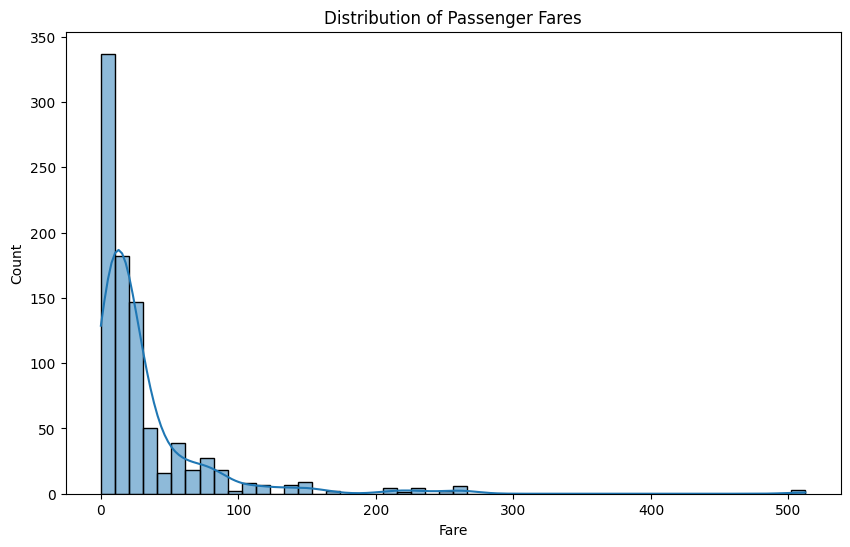

In [16]:
# Plot fare distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Fare', bins=50, kde=True)
plt.title('Distribution of Passenger Fares')
plt.xlabel('Fare')
plt.ylabel('Count')

# Calculate skewness
fare_skewness = df['Fare'].skew()
print(f"\nSkewness of fare distribution: {fare_skewness:.2f}")
print("\nInterpretation:")
if fare_skewness > 0:
    print("The fare distribution is positively skewed, indicating many lower-fare tickets with some high-fare outliers.")
elif fare_skewness < 0:
    print("The fare distribution is negatively skewed, indicating many higher-fare tickets with some low-fare outliers.")
else:
    print("The fare distribution is approximately symmetric.")

plt.show()

d. Bivariate Analysis

Now let's explore relationships between variables, particularly focusing on factors that might have influenced survival.

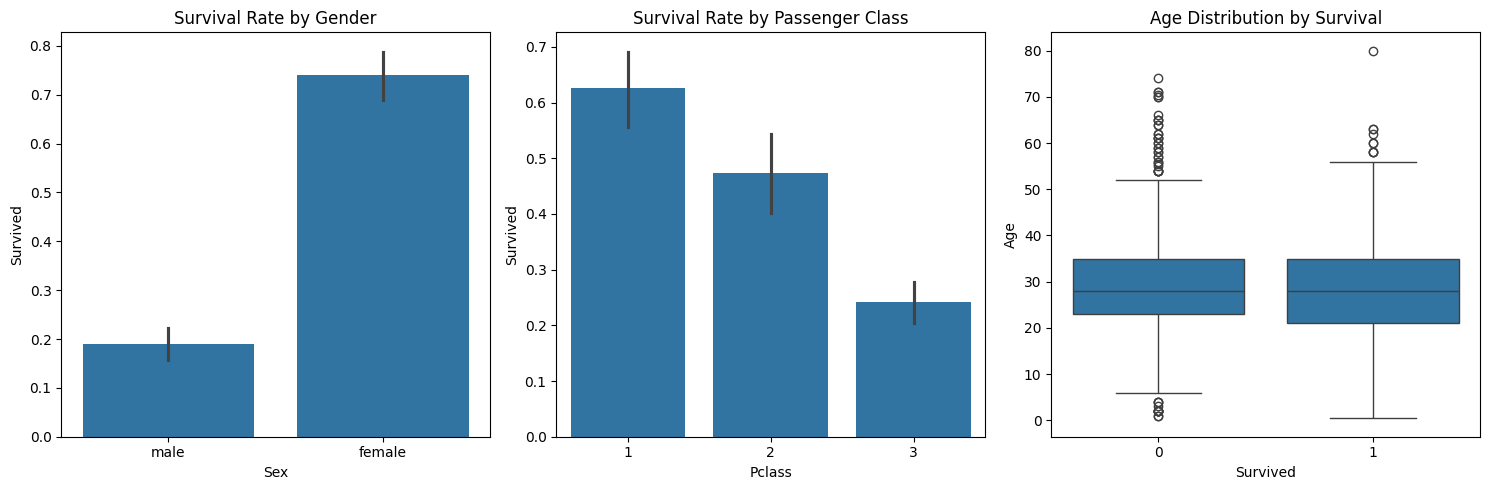

In [17]:
# Survival by Gender
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(data=df, x='Sex', y='Survived')
plt.title('Survival Rate by Gender')

# Survival by Passenger Class
plt.subplot(1, 3, 2)
sns.barplot(data=df, x='Pclass', y='Survived')
plt.title('Survival Rate by Passenger Class')

# Age vs Survival
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='Survived', y='Age')
plt.title('Age Distribution by Survival')

plt.tight_layout()
plt.show()

e. Correlation Analysis

Let's examine the correlations between numerical variables in our dataset.

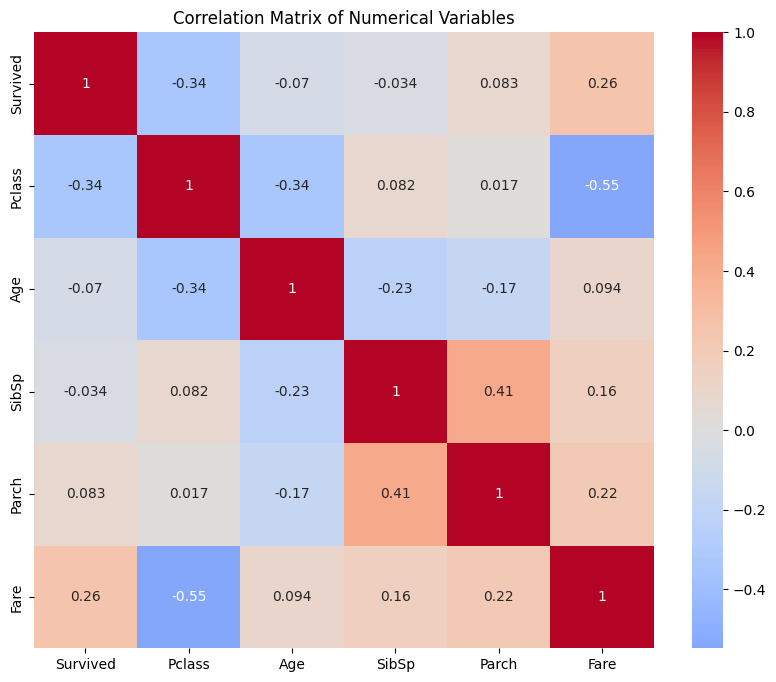

In [18]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

## Key Findings and Conclusions

- **Age Distribution**:
   - The age distribution shows the demographic makeup of passengers
   - The skewness value indicates the direction and extent of age distribution asymmetry

- **Passenger Demographics**:
   - The majority of passengers were male
   - There was a higher concentration of third-class passengers
   - The age distribution shows a majority of passengers were young adults
   - Children and younger passengers generally had higher survival rates
   
- **Survival Rate**:
   - Overall survival rate shows that more passengers did not survive than those who did
   - Gender played a crucial role in survival, with females having a significantly higher survival rate

- **Fare Analysis**:
   - The fare distribution shows the economic diversity of passengers
   - Strong positive skewness indicates many lower-fare tickets with some premium fares

- **Class and Survival**:
   - First-class passengers had a higher survival rate compared to other classes
   - Third-class passengers had the lowest survival rate

This analysis provides a foundation for more advanced statistical analysis or machine learning models.